<a href="https://colab.research.google.com/github/ntp-nguyen/Mini-Project/blob/main/Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install gdown

import gdown
import os

# Google Drive shareable link (replace with your own)
url = "https://docs.google.com/spreadsheets/d/1ufC04tiT9AklR9qbNDbp5e8JtTd6l3Gl/edit?usp=drive_link&ouid=104956529472026450736&rtpof=true&sd=true"   # Replace FILE_ID

# Get file info and name from gdown (fuzzy=True keeps original filename)
output = gdown.download(url=url, quiet=True, fuzzy=True)

# If the file already exists, skip download
if os.path.exists(output):
    print(f"File already exists: {output}")
else:
    output = gdown.download(url=url, quiet=False, fuzzy=True)
    print(f"Downloaded file: {output}")

# Get absolute path
file_path = os.path.abspath(output)

print("File name:", output)
print("Full path:", file_path)


File already exists: C5320_201601_1.xlsx
File name: C5320_201601_1.xlsx
Full path: /content/C5320_201601_1.xlsx


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_excel("/content/C5320_201601_1.xlsx")
df.head()

,Unnamed: 0,C5330 TOP 2B,C5320 TOP 2B,C5320 TOP IPM,C5320 Liquid Level,V5325 Liquid Level,C5320 Column Pressure Drop,C5320 #60 Tray Temperature,C5320 #30 Tray Temperature,C5320 Column Bottom Temperature,...,C5320 Bottoms Flow,C5320 Top Pressure,V5325 Withdrawal Flow,C5320 Feed Flow,C5320 #80 Tray Temperature,V5325 Temperature,C5260 TOP 2B,"C5260 TOP 1,4 PD",C5320 Feed IPM,C5320 Top Temperature
0,2016-01-01 00:00:00.000,ppm,vol%,vol%,%,%,kg/cm2,DegC,DegC,DegC,...,t/h,kg/cm2g,kg/h,t/h,DegC,DegC,vol%,vol%,WT%,DegC
1,2016-02-04 17:15:59.616,AI55304A.PV,AI55301A.PV,AI55301D.PV,LC55314.PV,LC55316.PV,PDI55333.PV,TI55313.PV,TI55314.PV,TI55315.PV,...,FC55303.PV,PC55330.PV,FC55306.PV,FC55302.PV,TI55312.PV,TI55318.PV,AI55204A.PV,AI55204B.PV,S017K,TI55311.PV
2,2016-01-01 00:00:00.000,26.25,19.76,45.110001,66.703133,75.810822,0.607237,56.026272,58.369026,61.041183,...,4.796843,0.760204,580.135315,5.581951,54.068516,23.889894,2.832259,3.18,92.949852,46.678272
3,2016-01-01 00:01:00.000,26.25,19.76,45.110001,66.626846,75.788734,0.607248,55.999119,58.365028,61.070675,...,4.779694,0.760215,579.182251,5.575968,54.017883,23.886343,2.832225,3.18,92.950035,46.725544
4,2016-01-01 00:02:00.000,26.25,19.76,45.110001,66.723923,75.767815,0.607259,56.003456,58.402325,61.042576,...,4.811172,0.760225,579.785095,5.591142,54.037357,23.842966,2.83219,3.18,92.950218,46.665352


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
C5330 TOP 2B,0
C5320 TOP 2B,0
C5320 TOP IPM,0
C5320 Liquid Level,0
V5325 Liquid Level,0
C5320 Column Pressure Drop,0
C5320 #60 Tray Temperature,0
C5320 #30 Tray Temperature,0
C5320 Column Bottom Temperature,0


In [ ]:
df1 = df.drop(index=[0,1])

In [ ]:
df1

,Unnamed: 0,C5330 TOP 2B,C5320 TOP 2B,C5320 TOP IPM,C5320 Liquid Level,V5325 Liquid Level,C5320 Column Pressure Drop,C5320 #60 Tray Temperature,C5320 #30 Tray Temperature,C5320 Column Bottom Temperature,...,C5320 Bottoms Flow,C5320 Top Pressure,V5325 Withdrawal Flow,C5320 Feed Flow,C5320 #80 Tray Temperature,V5325 Temperature,C5260 TOP 2B,"C5260 TOP 1,4 PD",C5320 Feed IPM,C5320 Top Temperature
2,2016-01-01 00:00:00,26.25,19.76,45.110001,66.703133,75.810822,0.607237,56.026272,58.369026,61.041183,...,4.796843,0.760204,580.135315,5.581951,54.068516,23.889894,2.832259,3.18,92.949852,46.678272
3,2016-01-01 00:01:00,26.25,19.76,45.110001,66.626846,75.788734,0.607248,55.999119,58.365028,61.070675,...,4.779694,0.760215,579.182251,5.575968,54.017883,23.886343,2.832225,3.18,92.950035,46.725544
4,2016-01-01 00:02:00,26.25,19.76,45.110001,66.723923,75.767815,0.607259,56.003456,58.402325,61.042576,...,4.811172,0.760225,579.785095,5.591142,54.037357,23.842966,2.83219,3.18,92.950218,46.665352
5,2016-01-01 00:03:00,26.25,19.76,45.110001,66.800545,75.751259,0.60727,56.030548,58.408085,61.012386,...,4.802842,0.760236,579.913879,5.62051,54.068172,23.878328,2.832156,3.18,92.950409,46.622894
6,2016-01-01 00:04:00,26.25,19.76,45.110001,66.784393,75.721458,0.607281,56.025898,58.441055,61.012508,...,4.784603,0.760246,580.293335,5.611067,54.067009,23.866394,2.832121,3.18,92.950592,46.646984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,2016-02-04 17:12:00,23.58,19.809999,37.099998,60.31171,67.165855,0.593897,56.074875,58.467709,61.226269,...,5.583215,0.791066,460.272613,6.215199,54.132675,24.214222,2.23,2.86,94.020416,46.298805
49995,2016-02-04 17:13:00,23.58,19.809999,37.099998,60.598171,67.158768,0.593904,56.025875,58.466782,61.218315,...,5.587077,0.791057,459.608551,6.197056,54.121735,24.249601,2.23,2.86,94.020897,46.267925
49996,2016-02-04 17:14:00,23.58,19.809999,37.099998,60.363934,67.165817,0.593911,56.021698,58.441566,61.188919,...,5.55161,0.791048,460.048126,6.192576,54.122982,24.264624,2.23,2.86,94.021378,46.309872
49997,2016-02-04 17:15:00,23.58,19.809999,37.099998,60.403305,67.19664,0.593918,56.025856,58.450466,61.208855,...,5.563695,0.791039,460.529846,6.171479,54.134056,24.266239,2.23,2.86,94.021858,46.318745


In [ ]:
df1[df1.isnull().any(axis=1)]

,Unnamed: 0,C5330 TOP 2B,C5320 TOP 2B,C5320 TOP IPM,C5320 Liquid Level,V5325 Liquid Level,C5320 Column Pressure Drop,C5320 #60 Tray Temperature,C5320 #30 Tray Temperature,C5320 Column Bottom Temperature,...,C5320 Bottoms Flow,C5320 Top Pressure,V5325 Withdrawal Flow,C5320 Feed Flow,C5320 #80 Tray Temperature,V5325 Temperature,C5260 TOP 2B,"C5260 TOP 1,4 PD",C5320 Feed IPM,C5320 Top Temperature
46905,2016-02-02 13:43:00,11.44,15.15,48.66,52.916794,60.864189,0.587619,56.032661,58.49752,60.950127,...,5.272995,NaN,469.762085,5.846483,54.122879,22.172932,1.726,3.57,94.320564,47.461098
46906,2016-02-02 13:44:00,11.44,15.15,48.66,52.90258,60.849861,0.587613,56.012051,58.48645,60.970184,...,5.27093,NaN,469.902649,5.872413,54.104694,22.142382,1.726,3.57,94.320702,47.456661


In [ ]:
df1.ffill(axis=0, inplace=True)
df1 = df1.infer_objects(copy=False)

/tmp/ipython-input-2229928763.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.ffill(axis=0, inplace=True)


In [ ]:
df1[df1.isnull().any(axis=1)]

,Unnamed: 0,C5330 TOP 2B,C5320 TOP 2B,C5320 TOP IPM,C5320 Liquid Level,V5325 Liquid Level,C5320 Column Pressure Drop,C5320 #60 Tray Temperature,C5320 #30 Tray Temperature,C5320 Column Bottom Temperature,...,C5320 Bottoms Flow,C5320 Top Pressure,V5325 Withdrawal Flow,C5320 Feed Flow,C5320 #80 Tray Temperature,V5325 Temperature,C5260 TOP 2B,"C5260 TOP 1,4 PD",C5320 Feed IPM,C5320 Top Temperature


In [ ]:
data = df1.values[:,1:]
data

array([[26.25, 19.76000023, 45.11000061, ..., 3.180000067, 92.94985199,
        46.67827225],
       [26.25, 19.76000023, 45.11000061, ..., 3.180000067, 92.9500351,
        46.72554398],
       [26.25, 19.76000023, 45.11000061, ..., 3.180000067, 92.9502182,
        46.66535187],
       ...,
       [23.57999992, 19.80999947, 37.09999847, ..., 2.859999895,
        94.02137756, 46.30987167],
       [23.57999992, 19.80999947, 37.09999847, ..., 2.859999895,
        94.02185822, 46.31874466],
       [23.57999992, 19.80999947, 37.09999847, ..., 2.859999895,
        94.02233887, 46.31400681]], dtype=object)

In [ ]:
print(data.shape)

(49997, 22)


In [ ]:
data_max = np.max(data, axis=0).reshape(1,-1)
data_max

array([[109.5199966, 36.61000061, 63.04999924, 73.47342682, 88.87852478,
        1.369913459, 56.27921295, 58.75927734, 61.35323715, 3.496101442,
        5.321285248, 31.85873181, 7.435493946, 0.811386228, 1000.0,
        8.067871094, 54.42534637, 27.54685974, 4.241000175, 7.820000172,
        95.21427917, 48.95826721]], dtype=object)

In [ ]:
data_min = np.min(data, axis=0).reshape(1,-1)
data_min

array([[5.769999981, 11.23999977, 10.52000046, 24.98301888, 51.6150589,
        0.568778157, 55.49621582, 57.93737793, 60.54580688, 2.804732014,
        3.787501574, 25.35751139, 0.363126695, 0.000405526, 0.0,
        4.921500683, 53.62044907, 20.69153404, 0.0, 0.0, 92.11129761,
        43.56478882]], dtype=object)

In [ ]:
data_normalize1 = np.zeros(data.shape)
data_normalize1 = (data - data_min) / (data_max - data_min)
data_normalize1

array([[0.1973975969773617, 0.33582972715423837, 0.6584808862239993, ...,
        0.40664961599184984, 0.2702414963755067, 0.5772681755381983],
       [0.1973975969773617, 0.33582972715423837, 0.6584808862239993, ...,
        0.40664961599184984, 0.27030050736105526, 0.5860327846794242],
       [0.1973975969773617, 0.33582972715423837, 0.6584808862239993, ...,
        0.40664961599184984, 0.27035951512389905, 0.574872619448838],
       ...,
       [0.17166265560859217, 0.3378005288233172, 0.5059965472552026, ...,
        0.3657288787844799, 0.6155627782718788, 0.5089633537958794],
       [0.17166265560859217, 0.3378005288233172, 0.5059965472552026, ...,
        0.3657288787844799, 0.6157176809004312, 0.5106084869285998],
       [0.17166265560859217, 0.3378005288233172, 0.5059965472552026, ...,
        0.3657288787844799, 0.6158725803062789, 0.5097300464014657]],
      dtype=object)

In [ ]:
data_normalize1_max = np.max(data_normalize1, axis=0).reshape(1,-1)
data_normalize1_min = np.min(data_normalize1, axis=0).reshape(1,-1)
print(data_normalize1_max)
print(data_normalize1_min)

[[1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
  1.0 1.0 1.0 1.0]]
[[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0]]


In [ ]:
data_normalize1[:,0].shape

(49997,)

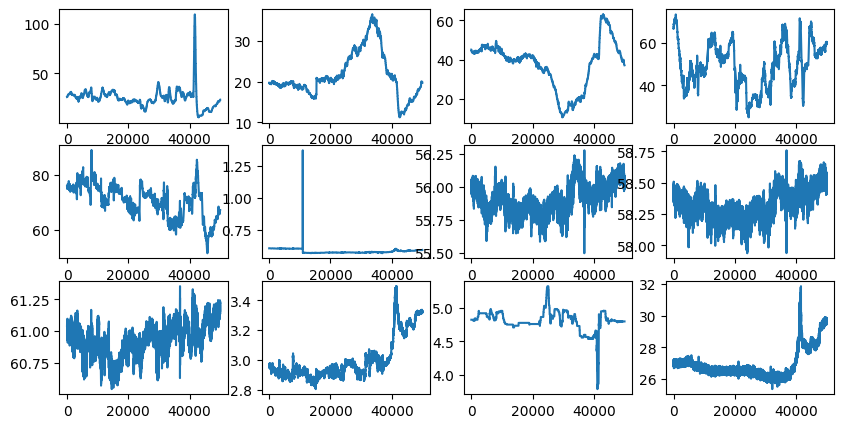

In [ ]:
fig, axs = plt.subplots(figsize=(10,5), nrows=3, ncols=4)

i = 0
for ax in axs:
  for a in ax:
    a.plot(data[:,i])
    i += 1

plt.show()

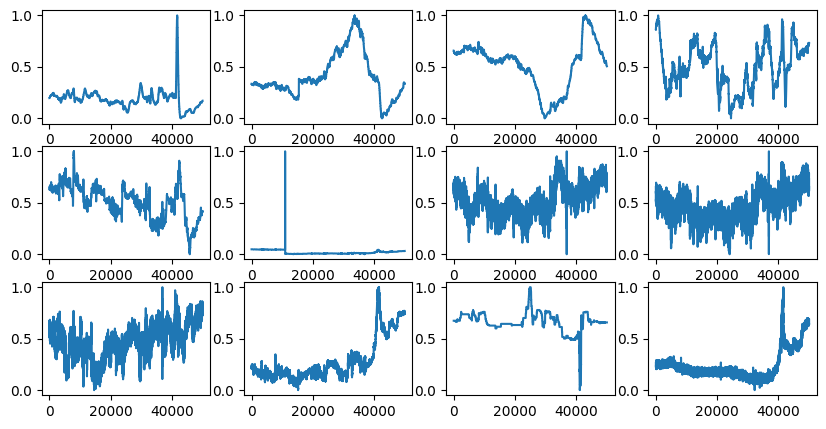

In [ ]:
fig, axs = plt.subplots(figsize=(10,5), nrows=3, ncols=4)

i = 0
for ax in axs:
  for a in ax:
    a.plot(data_normalize1[:,i])
    i += 1

plt.show()